<a href="https://colab.research.google.com/github/scheung97/EECE5639_ComputerVision/blob/main/p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Northeastern University
# EECE5639 Computer Vision

# Spenser Cheung & Tim Liming

# Project 2

import cv2 
import numpy as np 
import os
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep
from scipy import ndimage

from google.colab.patches import cv2_imshow
from google.colab import drive


In [ ]:
!python3 --version

In [4]:
# Mount Google Drive in Google Colab

# Public 'DanaOffice' folder link: 
# https://drive.google.com/drive/folders/1WUWYblxSid4YkRJawACK7tNizW79Zk6h?usp=sharing

# Public 'DanaHallWay1' folder link: 
# https://drive.google.com/drive/folders/1Y-nP4B0Usws3yPL4f0T-pGWNcd-o1qGs?usp=sharing

drive.mount('/content/gdrive', force_remount=True)

office_path = "/content/gdrive/MyDrive/EECE5639_P2_DanaOffice"
hallway_path = "/content/gdrive/MyDrive/EECE5639_P2_DanaHallWay1"

Mounted at /content/gdrive


In [5]:
# i. Read in two images.

# Office
office_files = [filename for filename in sorted(os.listdir(office_path)) if os.path.isfile(os.path.join(office_path, filename))]

office_images = []    
for i in range(0, len(office_files)): 
    img = cv2.imread(os.path.join(office_path, office_files[i]))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    office_images.append(gray_img)

office_images = np.array(office_images)
print(office_images.shape)


(10, 340, 512)


In [6]:
# i. Read in two images.

# Hallway
hallway_files = [filename for filename in sorted(os.listdir(hallway_path)) if os.path.isfile(os.path.join(hallway_path, filename))]

hallway_images = []
for i in range(0, len(hallway_files)): 
    img = cv2.imread(os.path.join(hallway_path, hallway_files[i]))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    hallway_images.append(gray_img)

hallway_images = np.array(hallway_images)
print(hallway_images.shape)


(3, 340, 512)


Reduced Images:


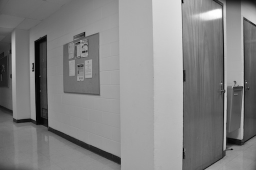

----------------------------------


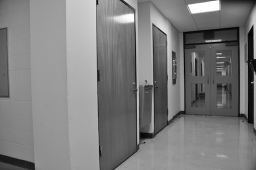

----------------------------------
Harris Corners:


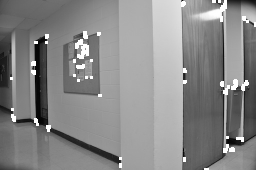

----------------------------------


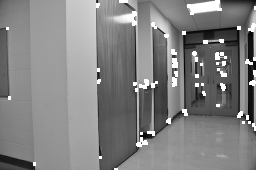

----------------------------------


In [42]:
# i. Read in two images. (Note: if the images are large, you may want to reduce
# their size to keep running time reasonable! Document in your report the scale
# factor you used.)

use_hall = True
#use_hall = False
if use_hall:
    img1, img2 = np.random.default_rng().choice(hallway_images, 2, replace=False)
else:
    img1, img2 = np.random.default_rng().choice(office_images, 2, replace=False)

#print('Original Images:')
#cv2_imshow(img1)
#print('--------------------------------------------------------------')
#cv2_imshow(img2)
#print('--------------------------------------------------------------')

scale = 0.5
r_img1 = cv2.resize(img1, (0,0), fx=scale, fy=scale)
r_img2 = cv2.resize(img2, (0,0), fx=scale, fy=scale)

print('Reduced Images:')
cv2_imshow(r_img1)
print('----------------------------------')
cv2_imshow(r_img2)
print('----------------------------------')


# ------------------------------------------------------------------------------
# ii. Apply Harris corner detector to both images: compute Harris R function 
# over the image, and then do non-maximum suppression to get a sparse set of 
# corner features.

dst1 = cv2.cornerHarris(np.float32(r_img1), blockSize=2, ksize=3, k=0.05)
dst2 = cv2.cornerHarris(np.float32(r_img2), blockSize=2, ksize=3, k=0.05)

dst1 = cv2.dilate(dst1, None)
dst2 = cv2.dilate(dst2, None)

r_img1[dst1>0.01*dst1.max()] = 255
r_img2[dst2>0.01*dst2.max()] = 255

print('Harris Corners:')
cv2_imshow(r_img1)
print('----------------------------------')
cv2_imshow(r_img2)
print('----------------------------------')